# Introduction 

This document explores a dataset containing information about <a href='https://www.prosper.com/'>Prosper</a>'s loan data. 

<b>We're specifically interested in learning about which kinds of loans yield the highest returns, and which loans have the lowest Annual Percentage Rate (APR).</b>

When you take out a loan, your interest rate represents the interest percentage you will be charged for borrowing the money, but does not include origination fees, closing fees, documentation fees, and other finance charges. 
We're looking at APR over interest rates because APR gives you a more comprehensive look at how much you’ll pay when you borrow money for a loan by factoring in these additional fees. When it comes to APR vs. interest rate, the former more accurately represents the true cost of the loan.

## Table of contents

## Preliminary Wrangling and Cleaning


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [17]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')

# Simplify the dataframe to only include relevant columns for this analysis
# Save df into a new variable to keep the original df untouched
df2 = df[['ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'ListingCategory (numeric)', 'EstimatedReturn', 'LenderYield', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount', 'IncomeRange', 'MonthlyLoanPayment']]

# high-level overview of data shape and composition
print(df2.shape)
print(df2.info())

(113937, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey                    113937 non-null object
ListingCreationDate           113937 non-null object
Term                          113937 non-null int64
LoanStatus                    113937 non-null object
BorrowerAPR                   113912 non-null float64
ListingCategory (numeric)     113937 non-null int64
EstimatedReturn               84853 non-null float64
LenderYield                   113937 non-null float64
EmploymentStatus              111682 non-null object
IsBorrowerHomeowner           113937 non-null bool
CreditScoreRangeLower         113346 non-null float64
LoanMonthsSinceOrigination    113937 non-null int64
LoanOriginalAmount            113937 non-null int64
IncomeRange                   113937 non-null object
MonthlyLoanPayment            113937 non-null float64
dtypes: bool(1), float64(5), int64(4), object(5)
memory usage: 12.3+ MB
None


We are dealing with 113,937 rows and 15 features.  

In [18]:
# Visual assessment
df2.sample(10)

ListingKey            ListingCreationDate  Term  \
72392  C53A354363281741205D14D  2012-03-26 12:06:28.583000000    36   
4985   99CD3544282656222D2CBCC  2012-04-22 11:45:26.303000000    36   
19420  56A1356521801144815A25F  2012-11-27 20:05:53.267000000    36   
94767  A53A336458687928102026E  2006-04-13 08:55:57.197000000    36   
29827  B761347900951142234973B  2010-03-09 15:43:51.937000000    36   
63563  2F52359279287021854D440  2013-11-03 06:09:17.217000000    36   
72441  419A34109134644165DFB9F  2008-01-08 21:15:34.250000000    36   
78812  987C3585383212258745141  2013-08-03 08:34:13.853000000    36   
48738  E2F63582977199715AC5DA4  2013-07-16 09:40:17.730000000    60   
38463  357B34795631474785D01AF  2010-03-31 10:25:40.330000000    36   

       LoanStatus  BorrowerAPR  ListingCategory (numeric)  EstimatedReturn  \
72392     Current      0.33973                          7          0.12760   
4985      Current      0.35797                         16          0.12460   
19420     Current      0.27285                          3          0.10390   
94767   Completed      0.18475                          0              NaN   
29827   Completed      0.28574                          1          0.14630   
63563     Current      0.30899                          1          0.10423   
72441  Chargedoff      0.19715                          3              NaN   
78812   Completed      0.25013                          7          0.09990   
48738     Current      0.26128                          1          0.11600   
38463   Completed      0.27569                          3          0.13410   

       LenderYield EmploymentStatus  IsBorrowerHomeowner  \
72392       0.2899    Self-employed                 True   
4985        0.3077         Employed                False   
19420       0.2246         Employed                False   
94767       0.1700              NaN                False   
29827       0.2525        Full-time                False   
63563       0.2599         Employed                 True   
72441       0.1725        Part-time                False   
78812       0.2024         Employed                False   
48738       0.2259         Employed                 True   
38463       0.2400    Self-employed                False   

       CreditScoreRangeLower  LoanMonthsSinceOrigination  LoanOriginalAmount  \
72392                  680.0                          24                4000   
4985                   700.0                          22                3000   
19420                  640.0                          15                8000   
94767                    NaN                          95               25000   
29827                  660.0                          48                4000   
63563                  680.0                           4                4000   
72441                  700.0                          74               20000   
78812                  680.0                           7                7500   
48738                  700.0                           8                3000   
38463                  680.0                          47                1500   

          IncomeRange  MonthlyLoanPayment  
72392  $50,000-74,999              169.78  
4985        $1-24,999              130.28  
19420  $25,000-49,999              311.60  
94767   Not displayed              900.68  
29827  $50,000-74,999              161.70  
63563  $50,000-74,999              163.28  
72441       $1-24,999              725.56  
78812  $50,000-74,999              283.49  
48738  $25,000-49,999               85.59  
38463       $1-24,999               59.64

Let's see if there are any null values in our dataset

In [19]:
df2.isnull().sum()

ListingKey                        0
ListingCreationDate               0
Term                              0
LoanStatus                        0
BorrowerAPR                      25
ListingCategory (numeric)         0
EstimatedReturn               29084
LenderYield                       0
EmploymentStatus               2255
IsBorrowerHomeowner               0
CreditScoreRangeLower           591
LoanMonthsSinceOrigination        0
LoanOriginalAmount                0
IncomeRange                       0
MonthlyLoanPayment                0
dtype: int64

In [20]:
# drop null credit score and Employment Status null values 
df2 = df2.dropna(subset = ['CreditScoreRangeLower', 'EmploymentStatus'], how = 'any' )

In [21]:
# Check to see if it worked
df2.isnull().sum()

ListingKey                        0
ListingCreationDate               0
Term                              0
LoanStatus                        0
BorrowerAPR                       0
ListingCategory (numeric)         0
EstimatedReturn               26827
LenderYield                       0
EmploymentStatus                  0
IsBorrowerHomeowner               0
CreditScoreRangeLower             0
LoanMonthsSinceOrigination        0
LoanOriginalAmount                0
IncomeRange                       0
MonthlyLoanPayment                0
dtype: int64

It is normal to have null values for Estimated Return Column because this column only has data for loans that originated after July 2009.

We notice that it's going to be difficult to use the credit score column since its values are not continuous. Let's create categories for different credit scores and use them in our analysis. 

In [22]:
# convert Credit Score into ordered categorical values

# Bin edges 
bin_edges = [-1, 1, 579, 669, 739, 799, 900] 

# Labels for our credit scores
bin_names = ['Not Available', 'Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

# Create CreditScore column
df2['CreditScore'] = pd.cut(df2['CreditScoreRangeLower'], bin_edges, labels=bin_names)

# Let's take a randon sample to see if our categories work
df2.sample(5)

ListingKey            ListingCreationDate  Term  \
15365   B1A93596475312206FDCB85  2013-12-12 15:09:07.783000000    36   
104697  91A335999334373684B7675  2014-01-17 14:49:44.660000000    36   
87144   817C3511767351172127DD0  2011-03-28 19:36:25.400000000    36   
90736   E48E35989825715288B1C05  2014-01-14 08:48:50.110000000    36   
56768   A7E833783631689957032F2  2006-12-31 13:23:46.840000000    36   

        LoanStatus  BorrowerAPR  ListingCategory (numeric)  EstimatedReturn  \
15365      Current      0.12081                         18          0.05568   
104697     Current      0.27776                         15          0.09211   
87144      Current      0.06888                          6          0.04000   
90736      Current      0.17611                          1          0.07344   
56768   Chargedoff      0.12462                          0              NaN   

        LenderYield EmploymentStatus  IsBorrowerHomeowner  \
15365        0.0830         Employed                 True   
104697       0.2294         Employed                 True   
87144        0.0555         Employed                 True   
90736        0.1300         Employed                 True   
56768        0.1050    Not available                False   

        CreditScoreRangeLower  LoanMonthsSinceOrigination  LoanOriginalAmount  \
15365                   720.0                           3                9000   
104697                  640.0                           2                4000   
87144                   820.0                          35                7000   
90736                   700.0                           2               15000   
56768                   520.0                          86                1200   

           IncomeRange  MonthlyLoanPayment  CreditScore  
15365        $100,000+              287.46         Good  
104697  $50,000-74,999              156.81         Fair  
87144   $50,000-74,999              214.70  Exceptional  
90736   $75,000-99,999              512.66         Good  
56768    Not displayed               39.29    Very Poor

Listing Categories are currently numeric. Let's convert these values into their names to make them more explicite. 

In [23]:
df2['ListingCategory (numeric)'] = df2['ListingCategory (numeric)'].replace({
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby&Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'})


In [24]:
# Rename the column
df2['ListingCategory'] = df2['ListingCategory (numeric)']

Some categories in the dataset are ordinal, however, they are currently of type object. Let's convert these to categorical type.  

In [25]:
# convert Term, IncomeRange, CreditScoreRangeLower, into ordered categorical types
ordinal_var_dict = {
                    'Term':        [12, 36, 60],
                    'IncomeRange': ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                    '$75,000-99,999', '$100,000+'],
                    'CreditScore': ['Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional'],
                    'LoanStatus':  ['Completed', 'Current', 'FinalPaymentInProgress', 'Defaulted', 'Chargedoff', 'Cancelled',
                                    'Past Due (1-15 days)',  'Past Due (16-30 days)',  'Past Due (31-60 days)', 
                                    'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df2[var] = df2[var].astype(ordered_var)

Test to see if they converted correctly. 

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111680 entries, 0 to 113936
Data columns (total 17 columns):
ListingKey                    111680 non-null object
ListingCreationDate           111680 non-null object
Term                          111680 non-null category
LoanStatus                    111680 non-null category
BorrowerAPR                   111680 non-null float64
ListingCategory (numeric)     111680 non-null object
EstimatedReturn               84853 non-null float64
LenderYield                   111680 non-null float64
EmploymentStatus              111680 non-null object
IsBorrowerHomeowner           111680 non-null bool
CreditScoreRangeLower         111680 non-null float64
LoanMonthsSinceOrigination    111680 non-null int64
LoanOriginalAmount            111680 non-null int64
IncomeRange                   111680 non-null category
MonthlyLoanPayment            111680 non-null float64
CreditScore                   111579 non-null category
ListingCategory               111

## Univariate Data Exploration

### Quantitative Variables

We'll start by looking at our two variables of interest: The distribution of Borrower APR and Estimated Return. 
We'll then proceed in looking at the distribution of other quantitative variables. 

#### Borrower APR
![](/images/univariate - distribution of borrower APR.png)

#### Borrower APR

Text(0, 0.5, 'Count')

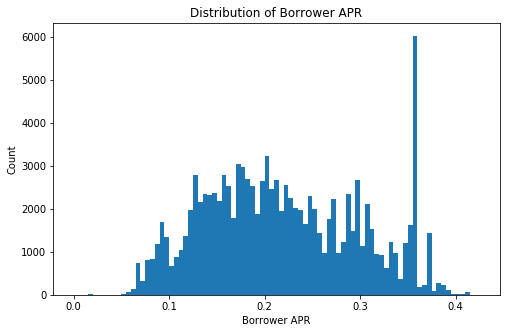

In [27]:
binsize = 0.005
bins = np.arange(0, df2.BorrowerAPR.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'BorrowerAPR', bins = bins);
plt.title('Distribution of Borrower APR')
plt.xlabel('Borrower APR')
plt.ylabel('Count')

Borrower APR is slightly skewed to the left. We can see some peaks throughout the whole distribution, the most obvious one being at 3.5. This seems to show that there are certain preconstructed borrower annual percentage rates, the most common one being 3.5%.  

In [28]:
df2.BorrowerAPR.describe()

count    111680.000000
mean          0.219291
std           0.080463
min           0.006530
25%           0.156290
50%           0.210250
75%           0.284880
max           0.423950
Name: BorrowerAPR, dtype: float64

#### Estimated Return

(0, 0.25)

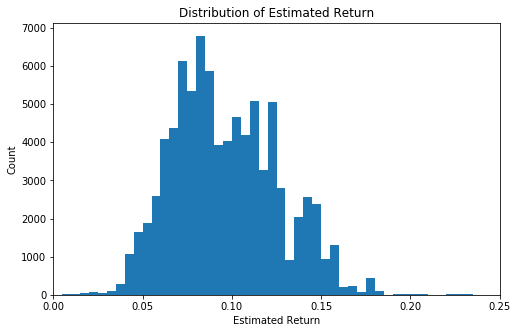

In [29]:
binsize = 0.005
bins = np.arange(0, df2.EstimatedReturn.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'EstimatedReturn', bins = bins);
plt.xlabel('Estimated Return')
plt.ylabel('Count')
plt.title('Distribution of Estimated Return')
plt.xlim(0, 0.25)

In [30]:
df2.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

The average return for a loan is 9.6%. The max in the dataset is 28%. 

#### Loan Months Since Origination 

Text(0.5, 0, 'Loan Months Since Origination')

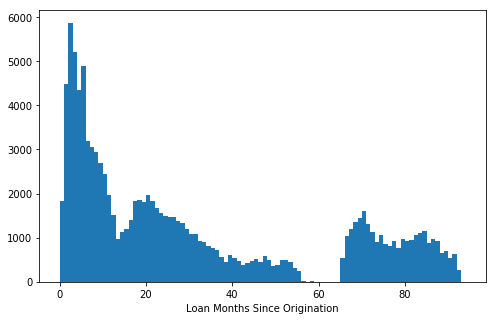

In [31]:
binsize = 1
bins = np.arange(0, df2.LoanMonthsSinceOrigination.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'LoanMonthsSinceOrigination', bins = bins);
plt.xlabel('Loan Months Since Origination')

It's interesting to see that there are no loans around the 60 month range. 

#### Loan Original Amount

Text(0.5, 0, 'Loan Original Amount')

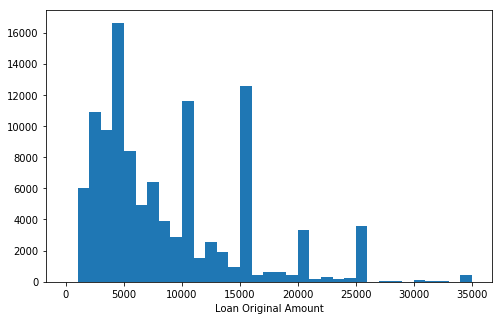

In [32]:
binsize = 1000
bins = np.arange(0, df2.LoanOriginalAmount.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'LoanOriginalAmount', bins = bins);
plt.xlabel('Loan Original Amount')

There's a long tail in the distribution, so let's put it on a log scale instead

(600, 50000)

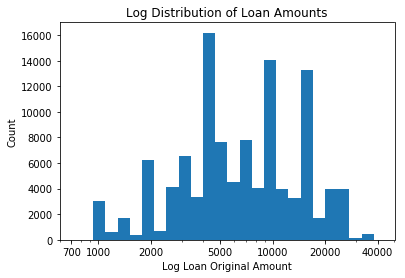

In [81]:
log_binsize = 0.07
bins = 10 ** np.arange(1.5, np.log(df2.LoanOriginalAmount.max())+log_binsize, log_binsize)
ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]

plt.hist(data = df2, x= 'LoanOriginalAmount', bins = bins);

plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Log Loan Original Amount')
plt.ylabel('Count')
plt.title('Log Distribution of Loan Amounts')
plt.xlim(600, 50000)

#### Monthly Loan Payment

Text(0.5, 0, 'Monthly Loan Payment')

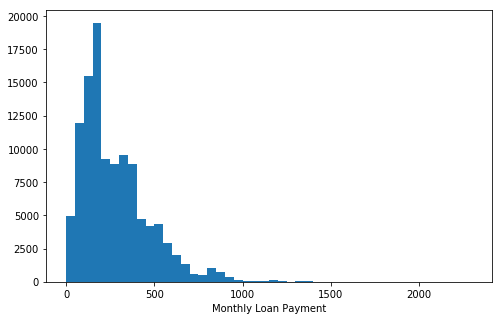

In [34]:
binsize = 50
bins = np.arange(0, df2.MonthlyLoanPayment.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'MonthlyLoanPayment', bins = bins);
plt.xlabel('Monthly Loan Payment')


Let's use a log scale for Monthly Loan Payment as well.

(20, 2500)

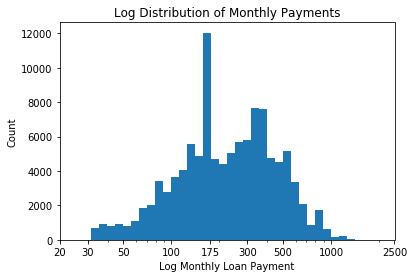

In [82]:
log_binsize = 0.05
bins = 10 ** np.arange(1.5, np.log(df2.MonthlyLoanPayment.max())+log_binsize, log_binsize)
ticks = [20, 30, 50, 100, 175, 300, 500, 1000, 2500]

plt.hist(data = df2, x= 'MonthlyLoanPayment', bins = bins);

plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Log Monthly Loan Payment')
plt.ylabel('Count')
plt.title('Log Distribution of Monthly Payments')
plt.xlim(20, 2500)

This log scale allows us to better understand the distribution of loans between 100 and 500 dollars. A commmon loan payment is around 175$ / month.

### Ordinal Variables 

#### Term, Income Range and Credit Score

In [ ]:
 'Term':        [12, 36, 60],
                    'IncomeRange': ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                    '$75,000-99,999', '$100,000+'],
                    'CreditScore': ['Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional'],
                    'LoanStatus':  ['Completed', 'Current', 'FinalPaymentInProgress', 'Defaulted', 'Chargedoff', 'Cancelled',
                                    'Past Due (1-15 days)',  'Past Due (16-30 days)',  'Past Due (31-60 days)', 
                                    'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']

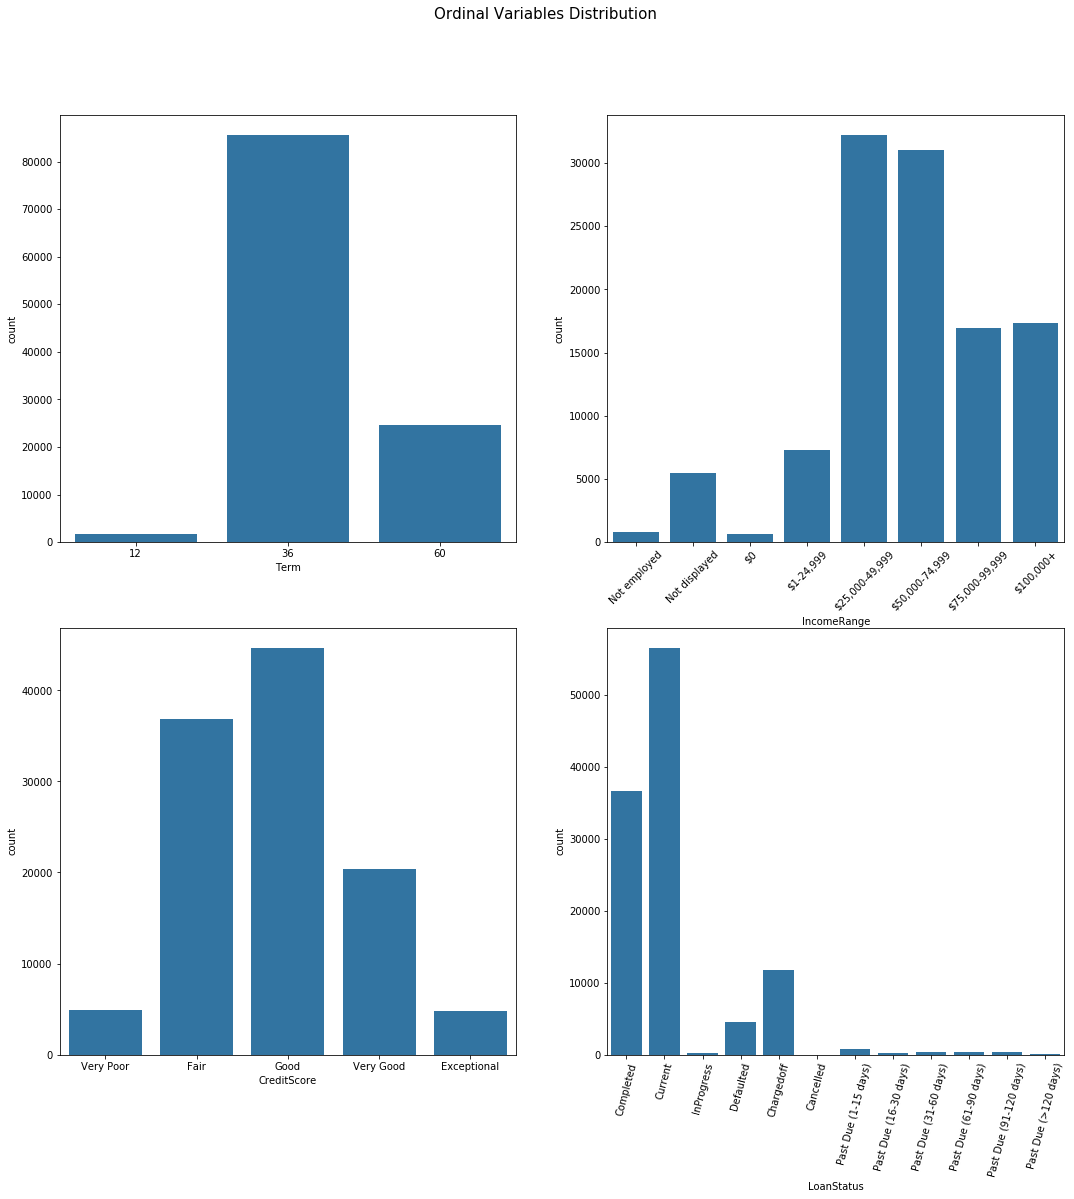

In [77]:
# let's plot all four ordinary variables together to get an idea of each distribution.

IncomeRange_labels = ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                    '$75,000-99,999', '$100,000+']
LoanStatus_labels = ['Completed', 'Current', 'InProgress', 'Defaulted', 'Chargedoff', 'Cancelled',
                                    'Past Due (1-15 days)',  'Past Due (16-30 days)',  'Past Due (31-60 days)', 
                                    'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']


fig, ax = plt.subplots(nrows=2 , ncols = 2, figsize = [18,15])

default_color = sb.color_palette()[0]
sb.countplot(data = df2, x = 'Term', color = default_color, ax = ax[0, 0])
sb.countplot(data = df2, x = 'IncomeRange', color = default_color, ax = ax[0, 1])
sb.countplot(data = df2, x = 'CreditScore', color = default_color, ax = ax[1, 0])
sb.countplot(data = df2, x = 'LoanStatus', color = default_color, ax = ax[1, 1])

ax[0,1].set_xticklabels(labels = IncomeRange_labels, rotation = 45)
ax[1,1].set_xticklabels(labels = LoanStatus_labels, rotation = 75)

plt.subplots_adjust(bottom = 0.01)
fig.suptitle("Ordinal Variables Distribution", fontsize=15)

plt.show()

Most loans are 36 month terms. Most borrowers have incomes of between 25,000 and 75,000$. 

### Categorical Variables 

### Employment Status, Is Borrower Homeowner	

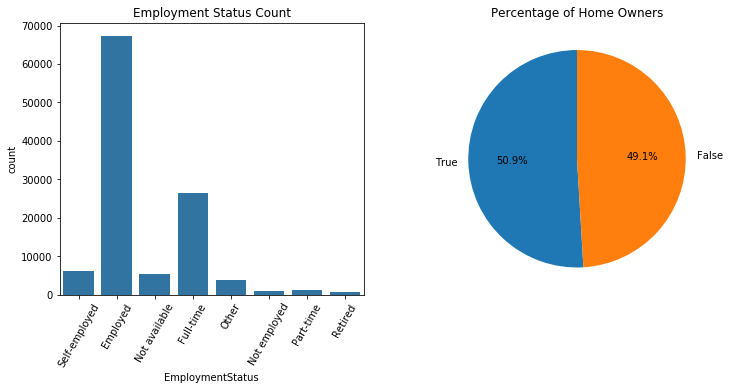

In [83]:
fig, ax = plt.subplots(ncols=2, figsize = [12,5])

default_color = sb.color_palette()[0]

sb.countplot(data = df2, x = 'EmploymentStatus', color = default_color, ax = ax[0])
plt.pie(df2.IsBorrowerHomeowner.value_counts().values, labels = df2.IsBorrowerHomeowner.value_counts().index,
        startangle = 90, autopct='%0.01f%%');

plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=60)

ax[0].set_title('Employment Status Count')
ax[1].set_title('Percentage of Home Owners')

plt.show()

Finally, let's look at the distrubution of Listing Categories.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

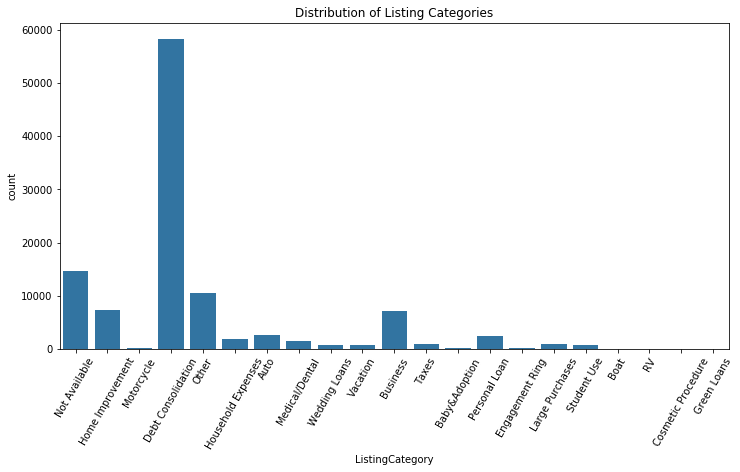

In [85]:
plt.figure(figsize = [12, 6])
default_color = sb.color_palette()[0]
sb.countplot(data = df2, x = 'ListingCategory', color = default_color)
plt.title('Distribution of Listing Categories')
plt.xticks(rotation = 60)

Most Listing Categories are Debt Consolidation. Other popular ones inclure Home Improvement, Auto, Business, and Other. 

## Bivariate Data Exploration 

### Correlations 
Let's look at pairwise correlations present between features in the data.

In [86]:
numeric_vars = ['EstimatedReturn', 'BorrowerAPR', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount', 'MonthlyLoanPayment']
categoric_vars = ['IncomeRange', 'CreditScore', 'IsBorrowerHomeowner']

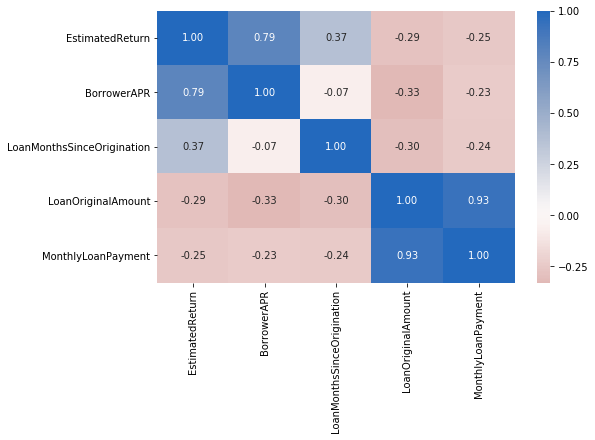

In [87]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df2[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [88]:
# plot matrix: sample 500 data points so that plots are clearer
samples = np.random.choice(df2.shape[0], 500, replace = False)
df2_samp = df2.loc[samples,:]

C:\Users\nasty\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


C:\Users\nasty\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\nasty\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


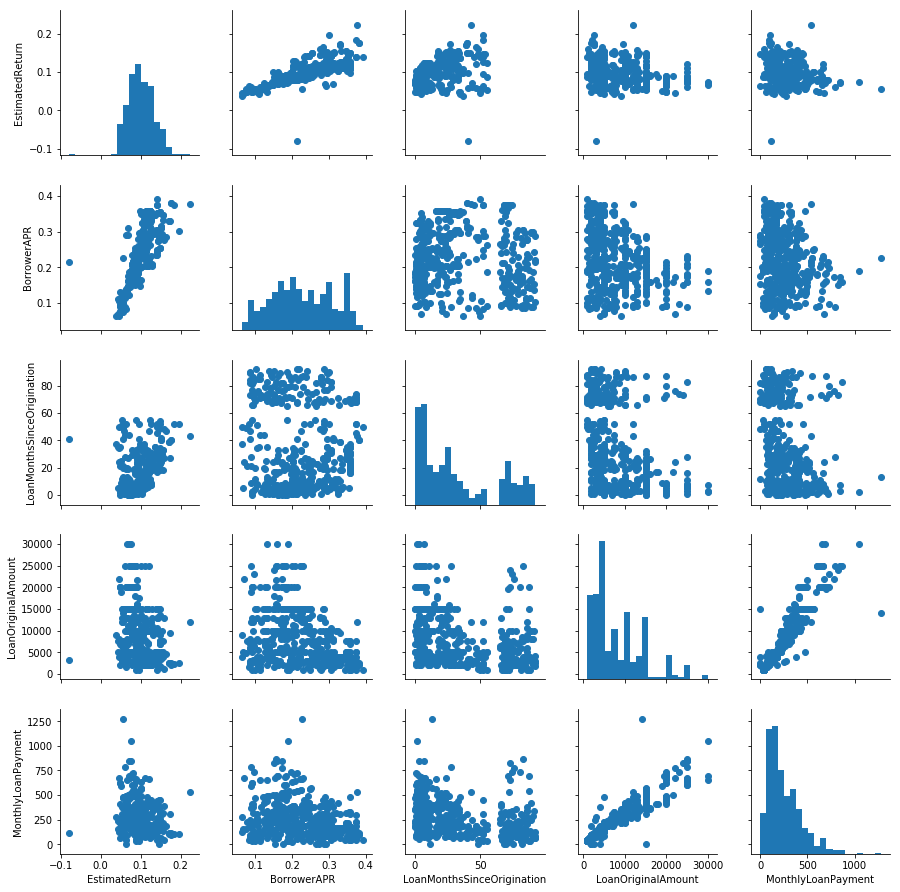

In [89]:
g = sb.PairGrid(data = df2_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

As expected, there is a high correlation between Borrower APR and Estimated Return. Correlations between other values are not significant so more exploration will be required. 

Loan Original Amount and Monthly Loan Payment were scaled using a log function at the beginning of our analysis, but they weren't in this Pair Grid. Let's compare Estimated Return and the log values of these two features.

Let's create our log function

In [90]:
# log function to easily transform data to its log values
def log_trans(x, inverse = False):
    if not inverse:
        
        return np.log10(x)
    else:
        return np.power(10, x)

<b>Estimated Return VS Loan Original Amount</b>

Text(0.5, 1.0, 'Estimated Return based on Loan Amount (log scale)')

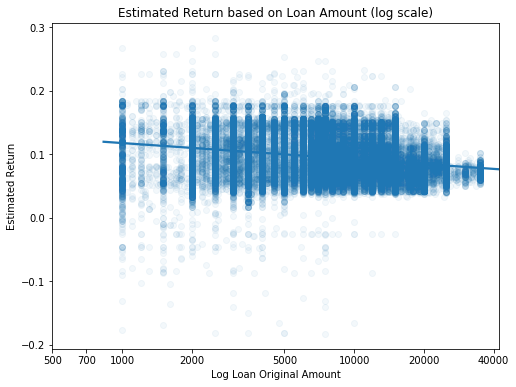

In [97]:
# Create a new column that has the log values of 'LoanOriginalAmount'
df2['log_loan_amount'] = df2['LoanOriginalAmount'].apply(log_trans)

# Create visualization
plt.figure(figsize = [8, 6])
ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]

sb.regplot(data = df2, x= 'log_loan_amount', y = 'EstimatedReturn', scatter_kws={'alpha':0.05});

plt.xticks(log_trans(np.array(ticks)), ticks)
plt.xlabel('Log Loan Original Amount');
plt.ylabel('Estimated Return')
plt.title('Estimated Return based on Loan Amount (log scale)')


We can see a slight negative correlation between the Estimated Return and the log of the Loan Amount. On average smaller loans tend to yield higher returns. However, there is also more variability in returns for the smaller the loan so this means that there is more risk associated with smaller loans. 

### Insight 1: 
If you were to invest multiple times in different loans, you would yield more returns with smaller loans. For a safer, one time bet, a higher loan would be more appropriate. 

<b>Estimated Return VS Loan Months Since Origination</b>

In [93]:
# take only the completed loans
df2_completed = df2.query('LoanStatus == "Completed"')

Text(0.5, 1.0, 'Estimated Return based on number of months of the loan')

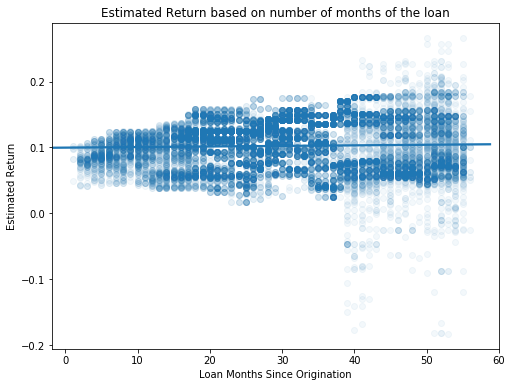

In [106]:
# Create visualization
plt.figure(figsize = [8, 6])

sb.regplot(data = df2_completed, x= 'LoanMonthsSinceOrigination', y = 'EstimatedReturn', scatter_kws={'alpha':0.05});
plt.xticks(xticks, xticks)
plt.xlabel('Loan Months Since Origination');
plt.ylabel('Estimated Return')
plt.title('Estimated Return based on number of months of the loan')

The duration of the loan seems to have no impact on return. We can see from this graph however that longer loans are riskier since they have higher variability in return. 

### Insight 2:
Longer term loans are more risky because they have more variability. On average however, the length of the loan has no impact  of estimated returns. 

### Let's now look at Estimated Returns and our categorical features. 

<b>Estimated Returns VS Listing Category</b>

There are 20 different listing categories, some of which are not represented much. Let's take only the listing categories where we have over 500 loans in the dataset, otherwise we might get some incomplete information about the loan.  

In [107]:
THRESHOLD = 500
loan_frequency = df2['ListingCategory'].value_counts()
idx = np.sum(loan_frequency > THRESHOLD)

most_loans = loan_frequency.index[:idx]
df2_topcategories = df2.loc[df2['ListingCategory'].isin(most_loans)]

loan_mean = df2_topcategories.groupby('ListingCategory').mean()

# List our categories with over 500 loans of that type
df2_topcategories['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         14708
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Name: ListingCategory, dtype: int64

Listing categories that have over 2500 loans in our dataset are: debt consolidation,  home improvement, business, auto, other, and not available. 
Let's look at their distribution with boxplots.

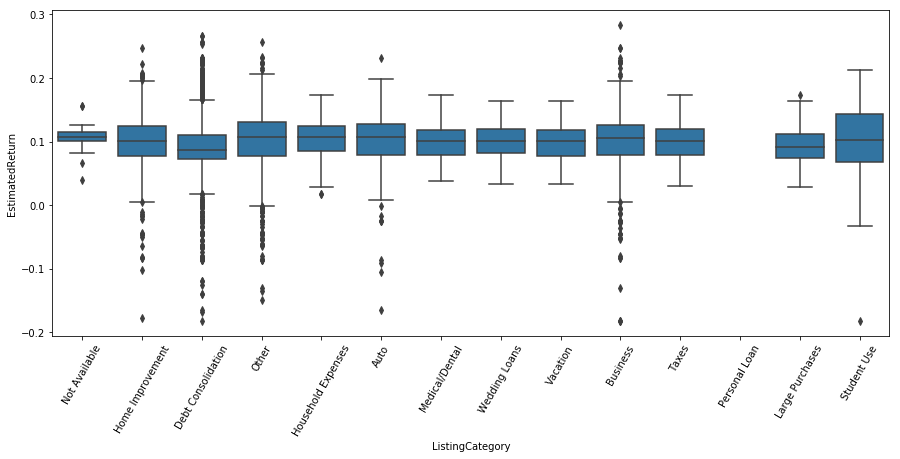

In [108]:
plt.figure(figsize = [15, 6])
sb.boxplot(data = df2_topcategories, x = 'ListingCategory', y = 'EstimatedReturn', color = default_color);
plt.xticks(rotation = 60);

What is the average return for each listing category?

In [109]:
loan_mean.EstimatedReturn.sort_values(ascending=False)

ListingCategory
Not Available         0.106649
Auto                  0.104257
Other                 0.103885
Household Expenses    0.103757
Business              0.103527
Student Use           0.103072
Wedding Loans         0.100418
Home Improvement      0.099917
Medical/Dental        0.099747
Taxes                 0.099172
Vacation              0.098706
Large Purchases       0.093404
Debt Consolidation    0.092565
Personal Loan              NaN
Name: EstimatedReturn, dtype: float64

Let's plot the average Estimated Return for the most popular loans

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

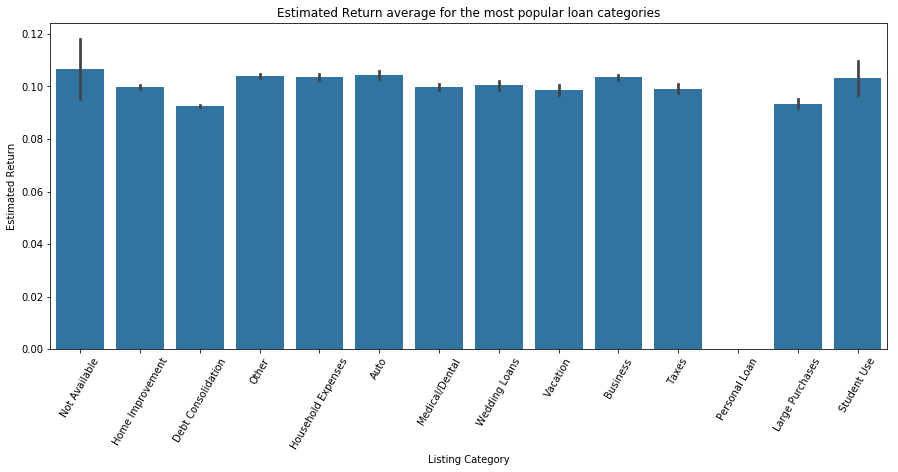

In [125]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [15, 6])
sb.barplot(data = df2_topcategories, x = 'ListingCategory', y = 'EstimatedReturn', color = base_color)
plt.title('Estimated Return average for the most popular loan categories')
plt.xlabel('Listing Category')
plt.ylabel('Estimated Return')
plt.xticks(rotation = 60)

### Insight 3: 
Investing in a Home Improvement loan and a large purchase loan, is slightly less profitable than the others on average. 

<b>BorrowerAPR and Estimated Return VS Credit Score and Income Range</b>

<Figure size 1296x720 with 0 Axes>

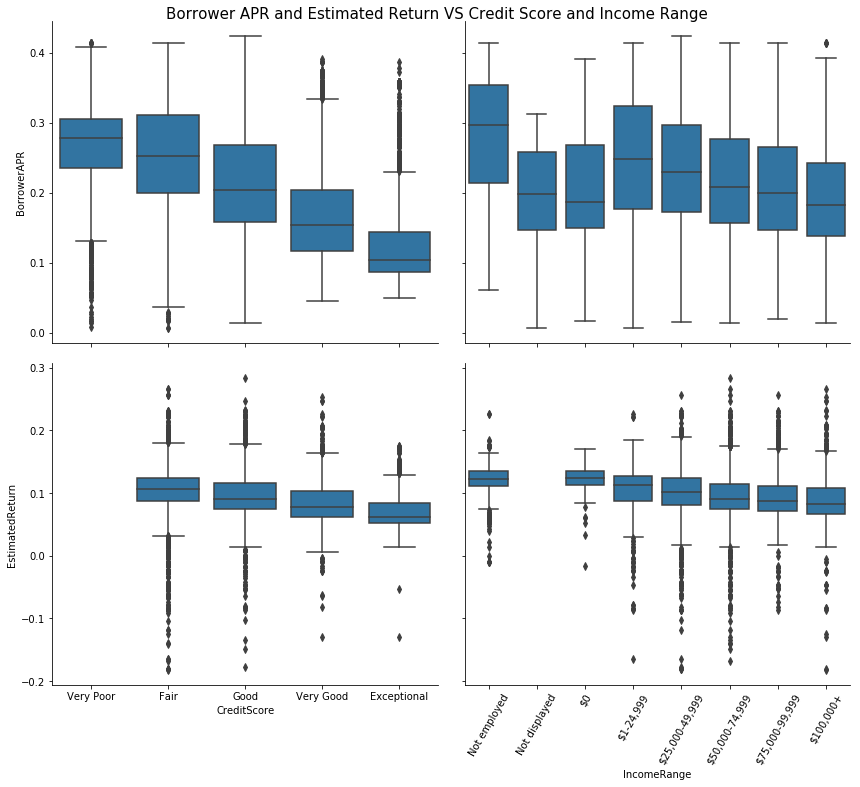

In [135]:
# Boxplot function
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

# Create visualization
plt.figure(figsize = [18, 10])
g = sb.PairGrid(data = df2, y_vars = ['BorrowerAPR', 'EstimatedReturn'], x_vars = ['CreditScore', 'IncomeRange'],
                height = 5, aspect = 1.2)
g.map(boxgrid)
plt.suptitle('Borrower APR and Estimated Return VS Credit Score and Income Range', fontsize = 15, y = 1)
plt.xticks(rotation = 60);

The average borrower APR becomes lower with better credit scores. Having an Exceptional credit score really makes a difference! The same thing can be said for income bracket, although the difference is less reveling. 

Loaning to borrowers that have lower incomes and lower credit scores yield slightly higher returns. 

### Insight 4: 
Having an exceptional credit score makes a huge difference in the APR one can get. 

<b>BorrowerAPR and Estimated Return VS Is Homeowner and Employment Status</b>

<Figure size 1296x1080 with 0 Axes>

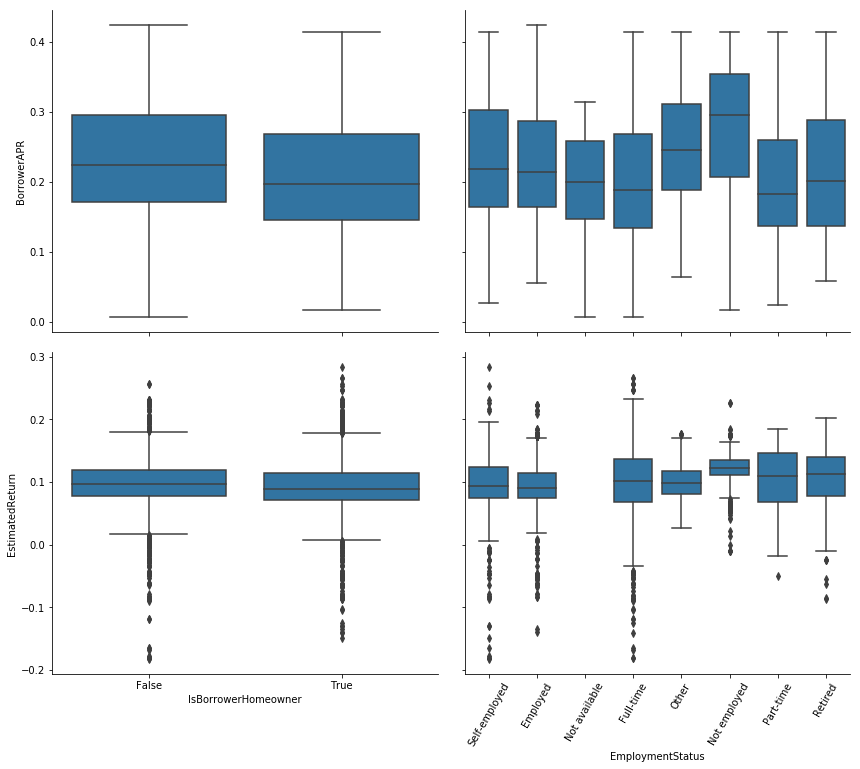

In [115]:
plt.figure(figsize = [18, 15])
g = sb.PairGrid(data = df2, y_vars = ['BorrowerAPR', 'EstimatedReturn'], x_vars = ['IsBorrowerHomeowner', 'EmploymentStatus'],
                height = 5, aspect = 1.2)
g.map(boxgrid)
plt.xticks(rotation = 60)
plt.show();

Borrower APR is higher on average for people that are not  employed. Other employment status' APR are relatively similar except for full and part time employees which is slightly less. Home owners have lower APR on average as well. 

As for return rates, there doesn't seem to be a significant difference in these variables and is not a distinguishing factor. 

<b>BorrowerAPR and Estimated Return VS Term and Loan Status</b>

<Figure size 1296x1080 with 0 Axes>

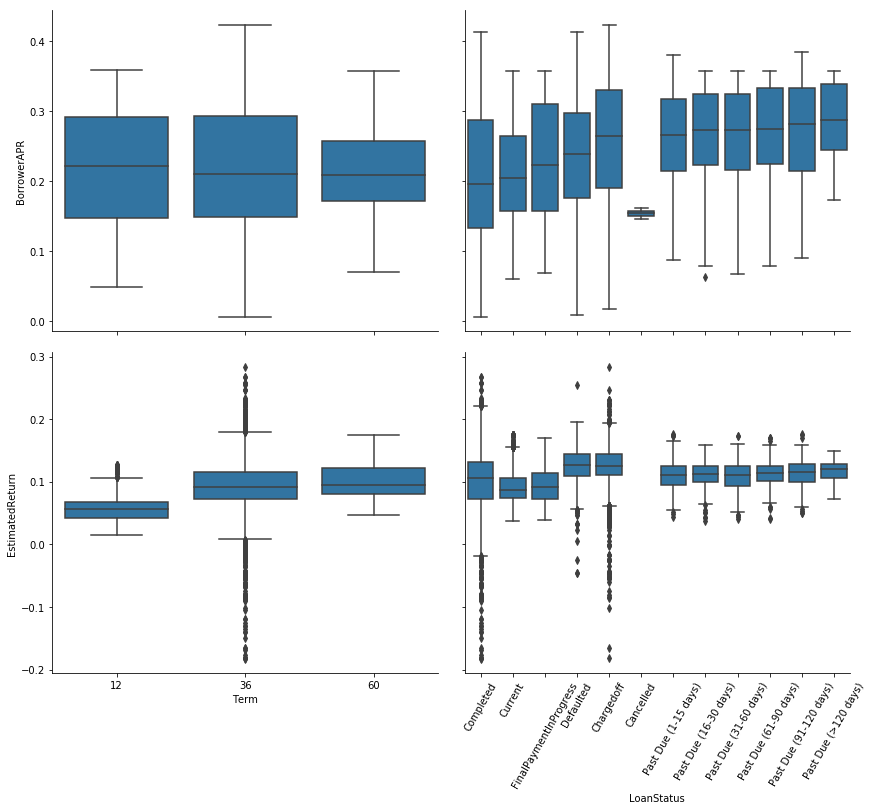

In [116]:
plt.figure(figsize = [18, 15])
g = sb.PairGrid(data = df2, y_vars = ['BorrowerAPR', 'EstimatedReturn'], x_vars = ['Term', 'LoanStatus'],
                height = 5, aspect = 1.2)
g.map(boxgrid)
plt.xticks(rotation = 60)
plt.show();

APR is the same for all loan durations. It becomes higher the longer the loan is due. 

Returns on the other hand increase with loan duration. Returns are slightly higher as well for loan status that are defaulted or that have been charged off. 

## Multivariable Exploration of Data

Are there features that strengthened each other in terms of looking at our features of interest?

We saw that the duration of the loan term seemed to have a high impact on returns. Let's have a look of how much difference it makes when comparing our different listing categories. 

### Estimated Return Analysis

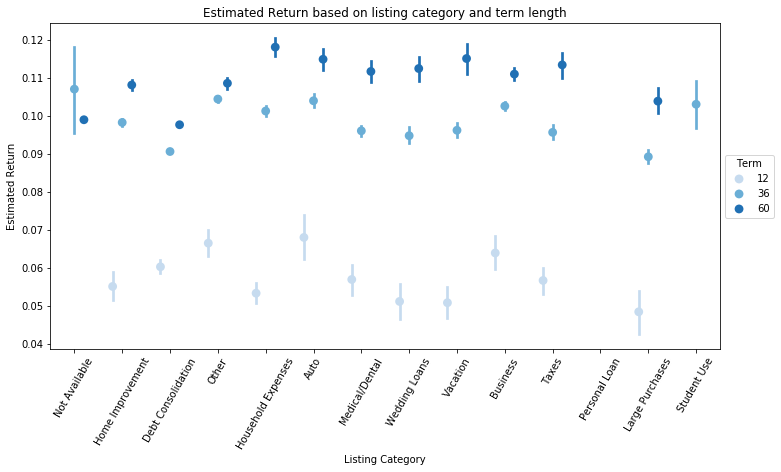

In [136]:
# plot figure
fig = plt.figure(figsize = [12,6])
ax = sb.pointplot(data = df2_topcategories, x = 'ListingCategory', y = 'EstimatedReturn',  hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)

plt.title('Estimated Return based on listing category and term length')
plt.xlabel('Listing Category')
plt.ylabel('Estimated Return')
plt.xticks(rotation = 60)
# plot legend outside of figure
ax.legend(loc='center left', title='Term', bbox_to_anchor=(1, 0.5))
plt.show();


### Insight 5:
Investing in a 60 month term loan is clearly a better investment than any other term. This is particularly true for the following categories: houseshold expenses, auto, medical/dental, wedding loans, vacation, business and taxes.

Are the other factors that make a loan more profitable? Let's look at profit for different employment status': <b>Full-time and Not employed.</b>

In [118]:
# Create Dataframes where employment status is full time and not employed to compare both
df2_topcategories_fulltime = df2_topcategories[df2_topcategories['EmploymentStatus'] == "Full-time"]
df2_topcategories_notemployed = df2_topcategories[df2_topcategories['EmploymentStatus'] == "Not employed"]

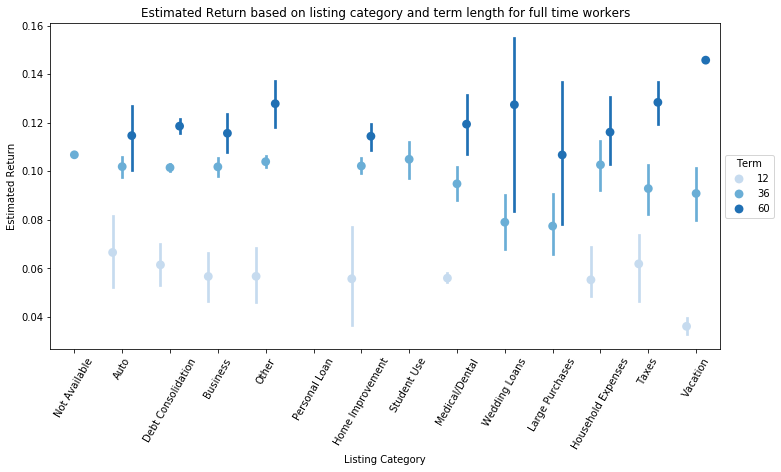

In [137]:
# plot figure
fig = plt.figure(figsize = [12,6])
ax = sb.pointplot(data = df2_topcategories_fulltime, x = 'ListingCategory', y = 'EstimatedReturn',  hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)

plt.title('Estimated Return based on listing category and term length for full time workers')
plt.xlabel('Listing Category')
plt.ylabel('Estimated Return')
plt.xticks(rotation = 60)
# plot legend outside of figure
ax.legend(loc='center left', title='Term', bbox_to_anchor=(1, 0.5))
plt.show();

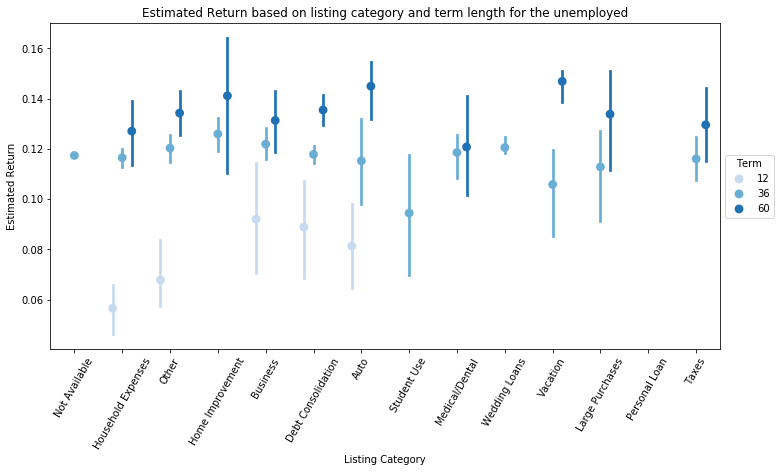

In [138]:
# plot figure
fig = plt.figure(figsize = [12,6])
ax = sb.pointplot(data = df2_topcategories_notemployed, x = 'ListingCategory', y = 'EstimatedReturn',  hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)

plt.title('Estimated Return based on listing category and term length for the unemployed')
plt.xlabel('Listing Category')
plt.ylabel('Estimated Return')
plt.xticks(rotation = 60)
# plot legend outside of figure
ax.legend(loc='center left', title='Term', bbox_to_anchor=(1, 0.5))
plt.show();

While there are ethical considerations at play, loans from unemployed people are yield more returns on average particularly in the home improvement, auto, and vacation category. 

That said, one listing category yields higher returns than any other category for fulltime employees: <b>vacation</b>

### Insight 6:
A 60 month term loan in the vacation cateogy for a fulltime employee is a very good investment. 

Is there a difference in returns depending on the loan amount? Let's look at the returns based on term duration and loan amount. 

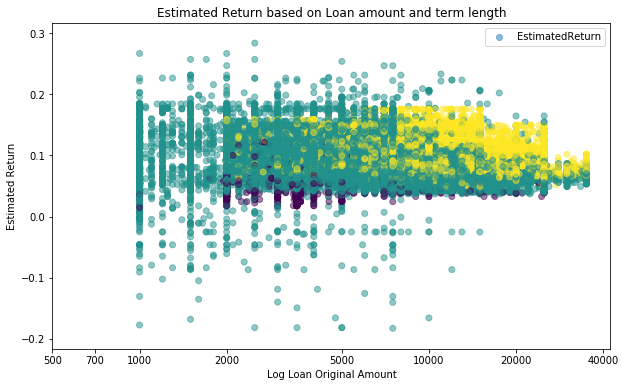

In [140]:
# Create a new column that has the log values of 'LoanOriginalAmount'
df2['log_loan_amount'] = df2['LoanOriginalAmount'].apply(log_trans)

# Create visualization
plt.figure(figsize = [10, 6])
ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]

plt.scatter(data = df2, x= 'log_loan_amount', y = 'EstimatedReturn', c = 'Term', alpha = 0.5);

plt.xticks(log_trans(np.array(ticks)), ticks)
plt.xlabel('Log Loan Original Amount')
plt.ylabel('Estimated Return')
plt.title('Estimated Return based on Loan amount and term length')
plt.legend()

======================
Question for the evaluator
====================

I am unable to get a legend that corresponds to the 'c' values in the scatterplot above. The legend defaults to indicating the y variable. How can I get the legend to work properly? 

Thanks!!

### Insight 7:
Loans over 6000$ and of a duration of 60 months yield the highest returns on average. 

### Borrower APR Analysis

Let's look at the influence of credit score and term length on borrower APR.

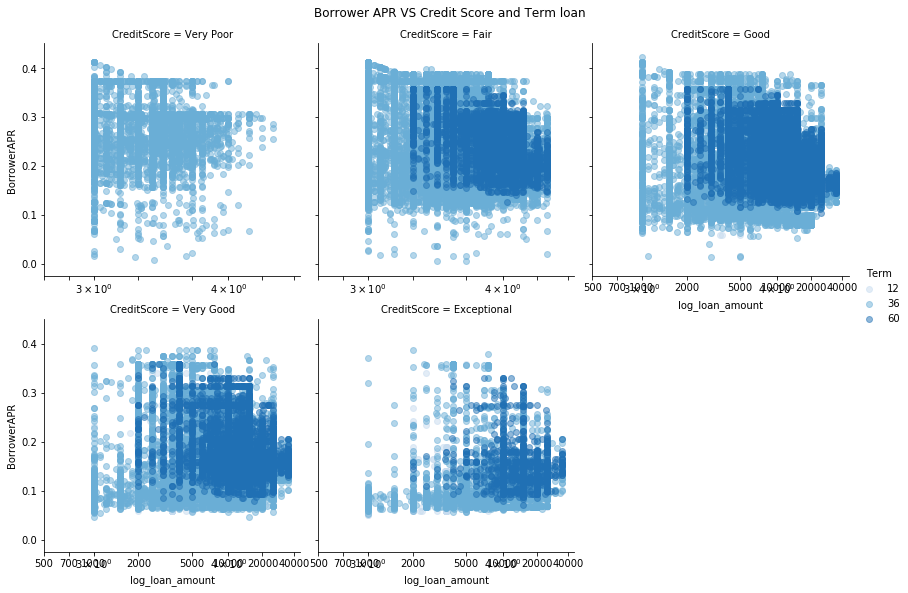

In [148]:
# plot the figure

g = sb.FacetGrid(data = df2, col = 'CreditScore', hue = 'Term', col_wrap = 3, height =4 , aspect = 1, palette = 'Blues')
g.map(plt.scatter, 'log_loan_amount','BorrowerAPR', alpha = 1/2)

g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]
g.set(xticks = log_trans(np.array(x_ticks)), xticklabels = x_ticks)
plt.suptitle('Borrower APR VS Credit Score and Term loan', y = 1.02)
g.add_legend()

As expected, lower credit scores correlate with higher APR. As the loan amount increases, the APR lowers as well. It's also interesting to see that for the "Very Poor" credit score category there are not 60 month term loans. 

Let's look at which category can the borrower get the best APR. 

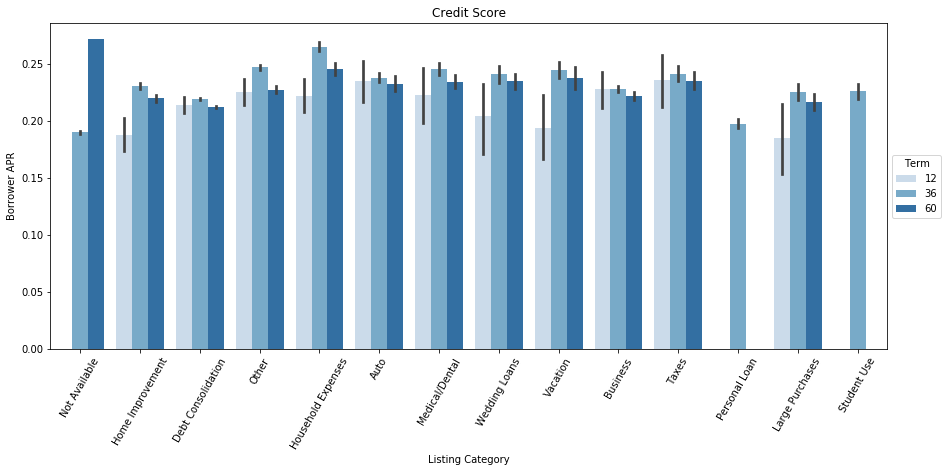

In [149]:
fig = plt.figure(figsize = [15,6])
ax = sb.barplot(data = df2_topcategories, x = 'ListingCategory', y = 'BorrowerAPR',  hue = 'Term', palette = 'Blues')
plt.title('Credit Score')
plt.xlabel('Listing Category')
plt.ylabel('Borrower APR')
plt.xticks(rotation = 60)
ax.legend(loc='center left', title='Term', bbox_to_anchor=(1, 0.5))
plt.show();

The lowest rates are for the 12 month term loan in home improvement, vacation and large purchases.

With so many variable it was hard to  get started without any financial knowledge. Thanks to Propers.com who  provided detailed description for each variable. So the first step before  conducting any data analysis is to understand the meaning of each variable.  After reading through the descriptions and definitions,  I chose ‘BorrowerRate’ as my target variable since this number matters  a lot to a potential borrower.

The next step is to get to know the variables. In R, we can use some  summary functions to get some general ideas about the dataset.  For example str(data) gives us the structure of the dataset,  summary(variable) gives us the summary statistics of variables.  Another approach is to use data visualizations. For individual variable,  histogram and boxplot are good way to show their distributions and  identify outliers.

After get some ideas of individual variable, we can move to next step and  start to explore the relations among variables, especially those related to  our target variable. Scatter plot is most commonly used plot to show  relations between two variables. In this project, I first made a scatter  matrix which shown multiple comparisons at once. From the scatter matrix  we can filter out some variables that have weak correlations with the  target variable. For those have stronger correlations, we can further  study their relationships.

A simple way to show relationships among multi variables is to add colors  to the plot. Using different colors to represent factorial variables. The  point size of the scatter plot can also be used to represent numerical  variables with larger size associated with larger numerical values.